In [17]:
from data import CIFAR10
from mmdew_adapter import MMDEWAdapter
from mmdew.mmd import MMD
import matplotlib.pyplot as plt

In [18]:
from sklearn import preprocessing
import numpy as np
def preprocess(x):
    return preprocessing.minmax_scale(x)
cifar = CIFAR10(preprocess=preprocess)

In [ ]:

cps = cifar._change_points
true_cps = [i for i, x in enumerate(cps) if x]
fst_cps = true_cps[0]
snd_cps = true_cps[1]
thrd_cps = true_cps[2]
fst_cps
print(true_cps)

[6000, 12000, 18000, 24000, 30000, 36000, 42000, 48000, 54000]


I have been getting weird values for my mmd between different classes. Lets just try it with conventional mmd

In [ ]:
mymmd = MMD(1)
X = []
Y = []
for i in range(snd_cps):
    if i < fst_cps:
        next_sample, _, is_change = cifar.next_sample()
        X.append(next_sample)
    else:
        next_sample, _, is_change = cifar.next_sample()
        Y.append(next_sample)
X = np.array(X).reshape(fst_cps, -1)
Y = np.array(Y).reshape(snd_cps - fst_cps, -1)

print(mymmd.mmd(X,X))
print(len(X))
print(len(Y))

IndexError: index 60000 is out of bounds for axis 0 with size 60000

## Sample of first dataset

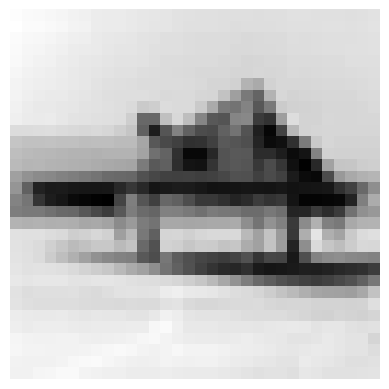

In [ ]:
image = X[1300].reshape(32, 32)
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers
plt.show()

## Sample of second dataset

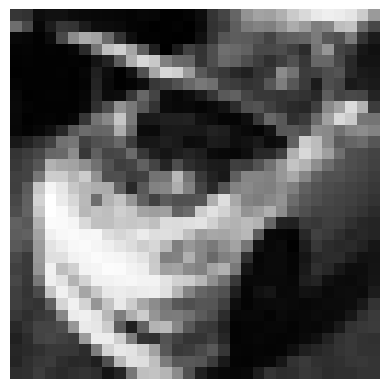

In [ ]:
image = Y[0].reshape(32, 32)
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers
plt.show()